In [28]:
# Define your hypotheses
# Null hypothesis: There's no difference in sepal length between Iris species.
# Alternative hypothesis: Sepal length differs between Iris species.


In [29]:
# Uses kernel: anaconda3 (Python 3.9.7)
# Import python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [30]:
# Load the iris_dataset and store it in the variable 'df'
df = pd.read_csv("/Users/samtaylor/Desktop/iris_dataset.csv")

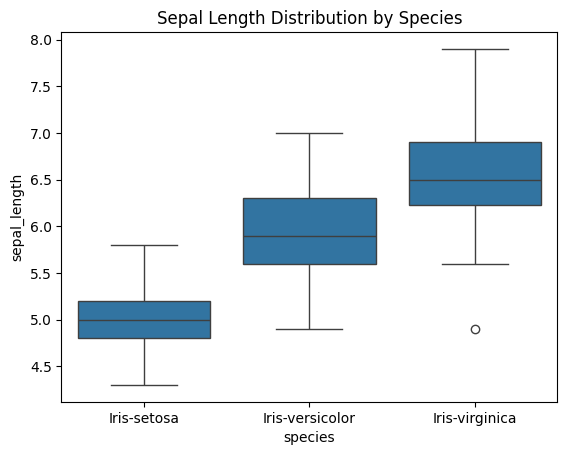

In [31]:
# Group the data by species
grouped = df.groupby(df.species)

# Visualize the data
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length Distribution by Species')
plt.show()


In [32]:
# Extract the 'sepal_length' data for each species
setosa_sepal_length = df[df['species'] == 'Iris-setosa']['sepal_length']
versicolor_sepal_length = df[df['species'] == 'Iris-versicolor']['sepal_length']
virginica_sepal_length = df[df['species'] == 'Iris-virginica']['sepal_length']

# Perform Shapiro-Wilk test for normality
shapiro_test_setosa = stats.shapiro(setosa_sepal_length)
shapiro_test_versicolor = stats.shapiro(versicolor_sepal_length)
shapiro_test_virginica = stats.shapiro(virginica_sepal_length)

# Return a message depending on the result of the p-value
if shapiro_test_setosa.pvalue > 0.05:
    print("Setosa Sepal Length is normally distributed (p-value:", shapiro_test_setosa.pvalue, ")")
else:
    print("Setosa Sepal Length is not normally distributed (p-value:", shapiro_test_setosa.pvalue, ")")


Setosa Sepal Length is normally distributed (p-value: 0.4595010578632355 )


In [33]:
from scipy.stats import levene

# Perform Levene's test (remember: we defined 'grouped' in our code above)
statistic, p_value = levene(
    grouped.get_group("Iris-setosa")["sepal_length"],
    grouped.get_group("Iris-versicolor")["sepal_length"],
    grouped.get_group("Iris-virginica")["sepal_length"],
)

alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. Variance is not equal (p-value: {p_value})")
else:
    print(f"Fail to reject the null hypothesis. Variance is equal (p-value: {p_value})")

Reject the null hypothesis. Variance is not equal (p-value: 0.0022585277836218586)


In [34]:
import pingouin as pg

# Welch's ANOVA test
result = pg.welch_anova(data=df, dv='sepal_length', between='species')

# Access the p-value from the result
p_value = result['p-unc'].values[0]

# Format the p-value to display with all decimals
formatted_p_value = "{:.35f}".format(p_value)

# Return a message depending on the result of the p-value
if p_value < 0.05:
    print(f"The sepal length differs significantly between Iris species. \np-value: {formatted_p_value}")
else:
    print(f"There's no significant difference in sepal length between Iris species. \np-value: {formatted_p_value}")


The sepal length differs significantly between Iris species. 
p-value: 0.00000000000000000000000000015050590


In [35]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

# Fit a one-way ANOVA model
model = ols('sepal_length ~ species', data=df).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Create a MultiComparison object for post-hoc tests
mc = MultiComparison(df['sepal_length'], df['species'])

# Perform Tukey's HSD post-hoc test
tukey_result = mc.tukeyhsd()

# Display the results
print("Tukey's HSD Post-Hoc Test:")
print(tukey_result)


Tukey's HSD Post-Hoc Test:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2     meandiff p-adj lower  upper  reject
-------------------------------------------------------------------
    Iris-setosa Iris-versicolor     0.93   0.0 0.6862 1.1738   True
    Iris-setosa  Iris-virginica    1.582   0.0 1.3382 1.8258   True
Iris-versicolor  Iris-virginica    0.652   0.0 0.4082 0.8958   True
-------------------------------------------------------------------
